<a href="https://colab.research.google.com/github/rlawl811-rgb/portfolio/blob/main/0814_K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 데이터셋 로드
dataset = pd.read_csv('/content/iris.csv')

# 특징 데이터 선택(첫 4개 열)
x = dataset.iloc[:,[0,1,2,3]].values

In [4]:
from sklearn.cluster import KMeans

# WCSS (Within Cluster Sum of Squeares) 값을 저장할 리스트 초기화
wcss = []

# 1부터 10까지의 클러스터 개수에 대해 반복
for i in range(1,11):
  # KMeans 모델 초기화 및 학습
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  #n_cluster 몇개로 나눌까. 즉 K값. 군집의 개수. max_iter 계산을 반복할 최대횟수, n_init 초기화 반복횟수
  kmeans.fit(x)
  # WCSS 값 저장
  wcss.append(kmeans.inertia_) #inertia는 총 합. WCSS(Within Cluster Sum of Squeares)값을 나타냄

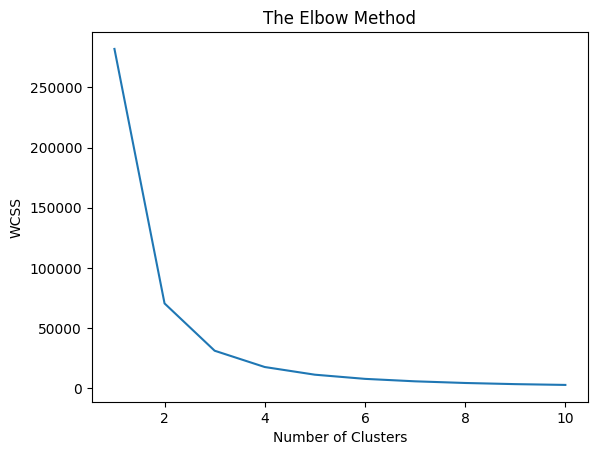

In [5]:
#엘보우 방법 시각화
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method') #그래프 제목
plt.xlabel('Number of Clusters') #x축 레이블
plt.ylabel('WCSS') #y축 레이블
plt.show() #그래프 출력 (그래프에서 확 꺾이는 지점이 적정k값)

In [6]:
# 최적의 클러스터 개수(3)으로 KMeans 모델 학습
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x) #클러스터 할당 결과 예측

2차원 상에 시각화

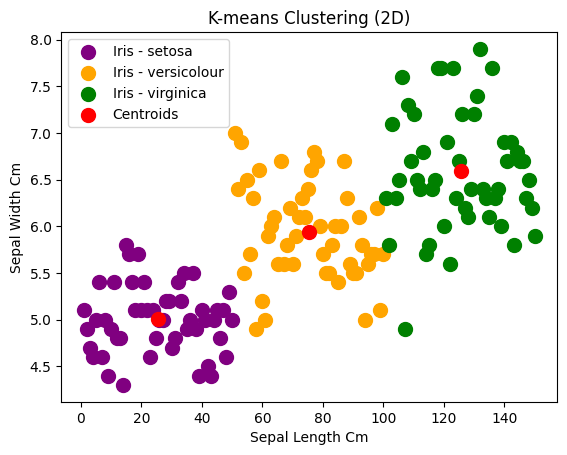

In [7]:
# 2차원 시각화
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0,1], s = 100, c = 'purple', label = 'Iris - setosa') # 첫 번째 클러스터
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1,1], s = 100, c = 'orange', label = 'Iris - versicolour') # 두 번째 클러스터
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2,1], s = 100, c = 'green', label = 'Iris - virginica') # 세 번째 클러스터

# 센트로이드 시각화
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red', label = 'Centroids')

# 범례 표시
plt.legend()
plt.title('K-means Clustering (2D)')
plt.xlabel('Sepal Length Cm')
plt.ylabel('Sepal Width Cm')
plt.show()

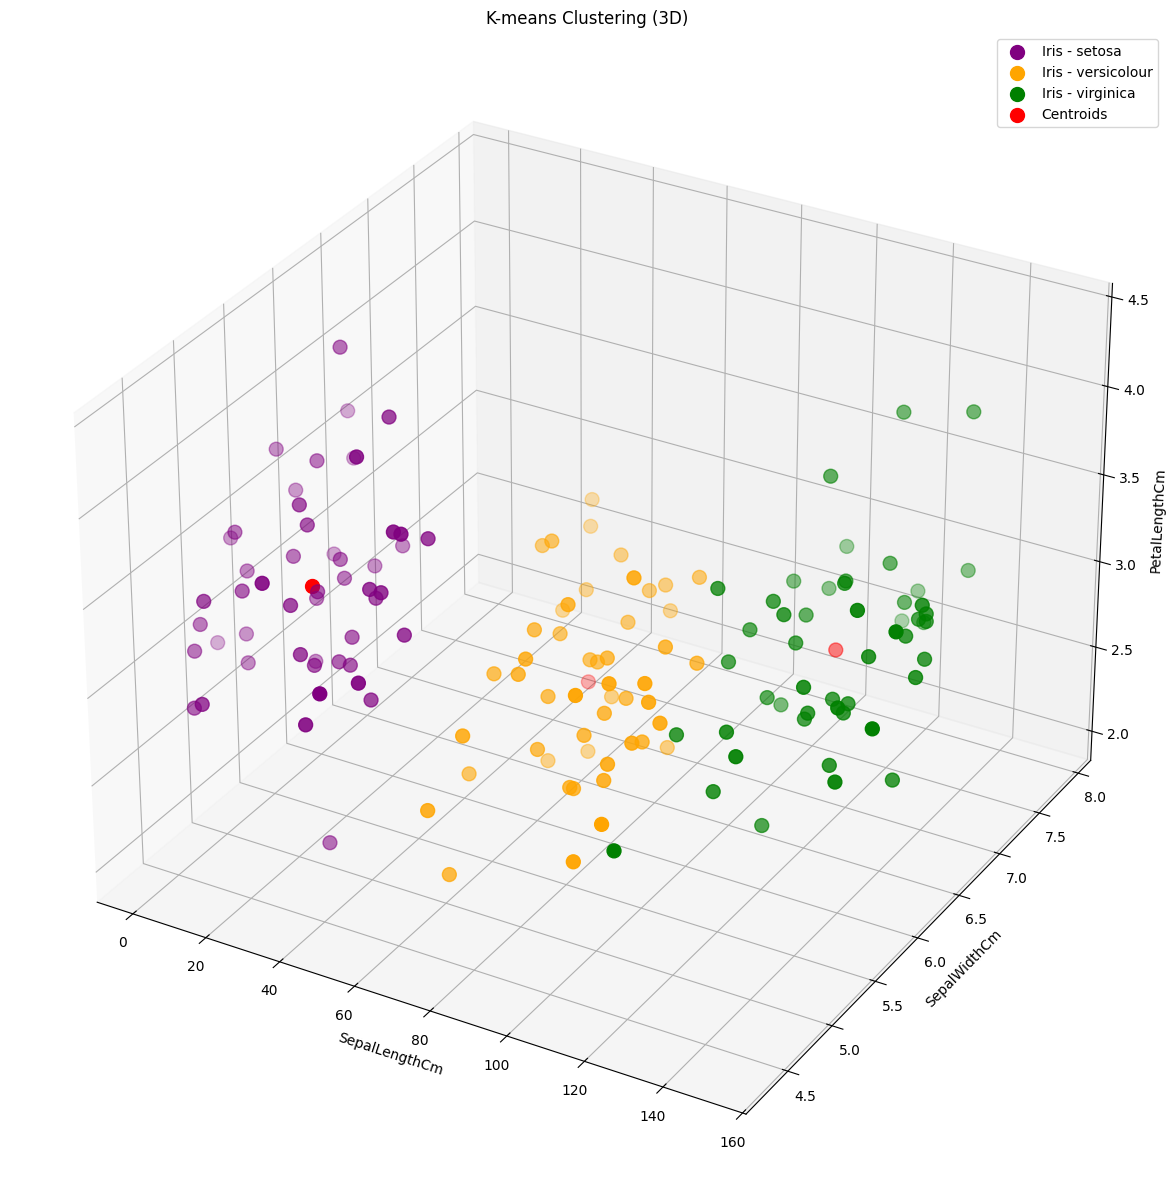

In [9]:
# 3차원 시각화
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], x[y_kmeans == 0,2], s = 100, c = 'purple', label = 'Iris - setosa')
ax.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], x[y_kmeans == 1,2], s = 100, c = 'orange', label = 'Iris - versicolour')
ax.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], x[y_kmeans == 2,2], s = 100, c = 'green', label = 'Iris - virginica')

# 센트로이드 시각화
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s=100, c='red', label = 'Centroids')

# 축 레이블 설정
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')
ax.set_zlabel('PetalLengthCm')

# 범례 표시
plt.legend()
plt.title('K-means Clustering (3D)') # 그래프 제목 추가

# 그래프 표시
plt.show()